### Задачи 1 и 2.

$\textbf{1.}$ Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$ с параметром $\theta = 10$. Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$ постройте доверительные интервалы, полученные в теоретических задачах. Изобразите их на графиках в координатах $(n, \theta)$.

$\textbf{2.}$ Для $n = 100$ оцените вероятность попадания истинного значения $\theta$ в интервал (в каждой задаче). Для этого сгенерируйте достаточно много выборок (предложите, сколько нужно выборок), постройте по каждой из них интервалы и определите, сколько раз в интервалы попадает истинное значение $\theta.$ Таким способом будет построена бернуллиевская выборка, по ней оцените вероятность.

In [1]:
import numpy as np
from scipy import stats as sps
from matplotlib import pyplot as plt

In [2]:
N = 100                   # размер выборки
K = 1000                  # количество выборок
theta = 10                # оцениваемый параметр для всех распределений
alpha = 0.95              # уровень доверия
N_nums = np.arange(0, N)
K_nums = np.arange(0, K)

In [3]:
# строит доверительные интервалы с нижней границей t1 и верхней t2
def plotting(t1, t2, flag=False):
    
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.fill_between(N_nums, t1, t2)
    plt.xlabel("sample size", fontsize=18)
    plt.ylabel("confidence interval values", fontsize=18)
    if flag:
        plt.ylim(5, 20)
    plt.show()

In [4]:
T_1 = np.array([0.0] * N) # массив нижних границ доверительных интервалов
T_2 = np.array([0.0] * N) # массив верхних границ доверительных интервалов

In [5]:
# строит бернулиеву выборку для любого распределения, 
# в котором func - функция построения доверительного интервала,
# а samples - K выборок из распределения размера N
# возвращает вероятность попадания значения theta в интервал
def solution(func, samples):
    
    bernoulli_sample = np.array([0] * K)
    for i in K_nums:
        t1, t2 = func(samples[i], N)
        if t1 <= theta <= t2:
            bernoulli_sample[i] = 1
    return np.sum(bernoulli_sample) / K

$\textbf{Равномерное распределение}$

In [6]:
uniform_samples = np.array([np.random.uniform(0, theta, size=N) for _ in K_nums])

$T_1(X) = \frac{2\overline{X}}{1 + \frac{1}{\sqrt{3n(1 - \alpha)}}}$,
$T_2(X) = \frac{2\overline{X}}{1 - \frac{1}{\sqrt{3n(1 - \alpha)}}}$

In [7]:
# возвращает доверительные интервалы T1 и T2 (по формуле выше) для выборки из нормального распределения размера n
def uniform_X_mean_interval(uniform_sample, n):
    
    mean = np.sum(uniform_sample[0:n]) / n
    addend = 1 / (15 * n * (1-alpha)) ** 0.5
    T_1 = 2 * mean / (1 + addend)
    T_2 = 2 * mean / (1 - addend)
    return T_1, T_2

In [8]:
for n in N_nums:
    T_1[n], T_2[n] = uniform_X_mean_interval(uniform_samples[0], n+1)

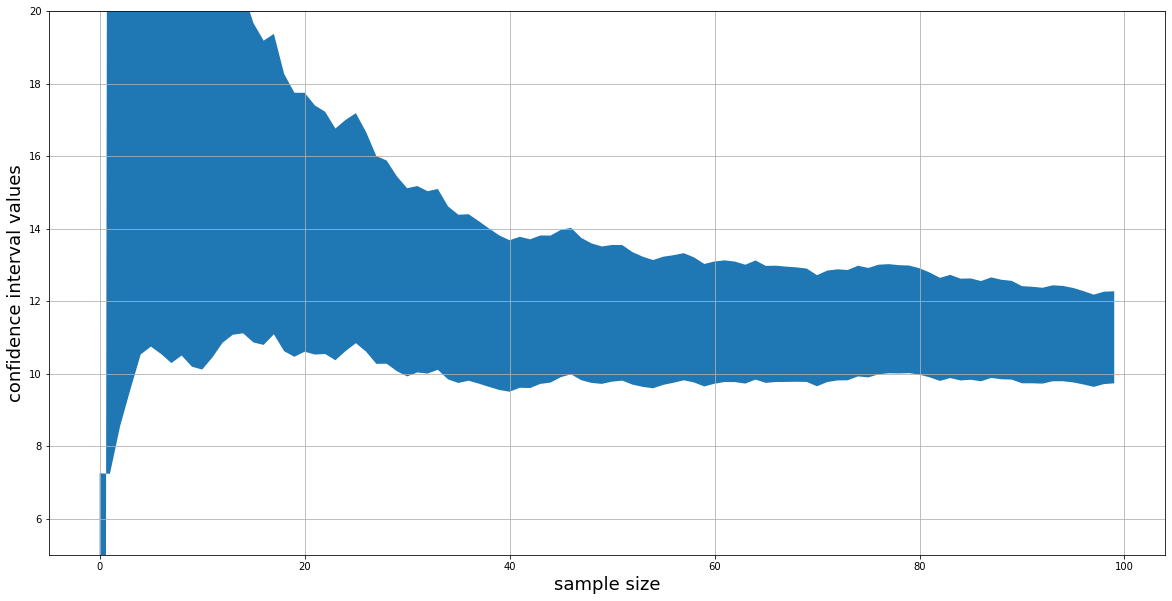

In [9]:
plotting(T_1, T_2, True)

In [10]:
print(f"Уровень доверия = {solution(uniform_X_mean_interval, uniform_samples)}")

Уровень доверия = 0.96


$T_1(X) = X_{(1)}$,
$T_2(X) = \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}}$

In [11]:
# возвращает доверительные интервалы T1 и T2 (по формуле выше) для выборки из нормального распределения размера n
def uniform_X_min_interval(uniform_sample, n):
    
    T_1 = np.min(uniform_sample[0:n])
    T_2 = T_1 / (1 - alpha ** (1. / n))
    return T_1, T_2

In [12]:
for n in N_nums:
    T_1[n], T_2[n] = uniform_X_min_interval(uniform_samples[0], n+1)

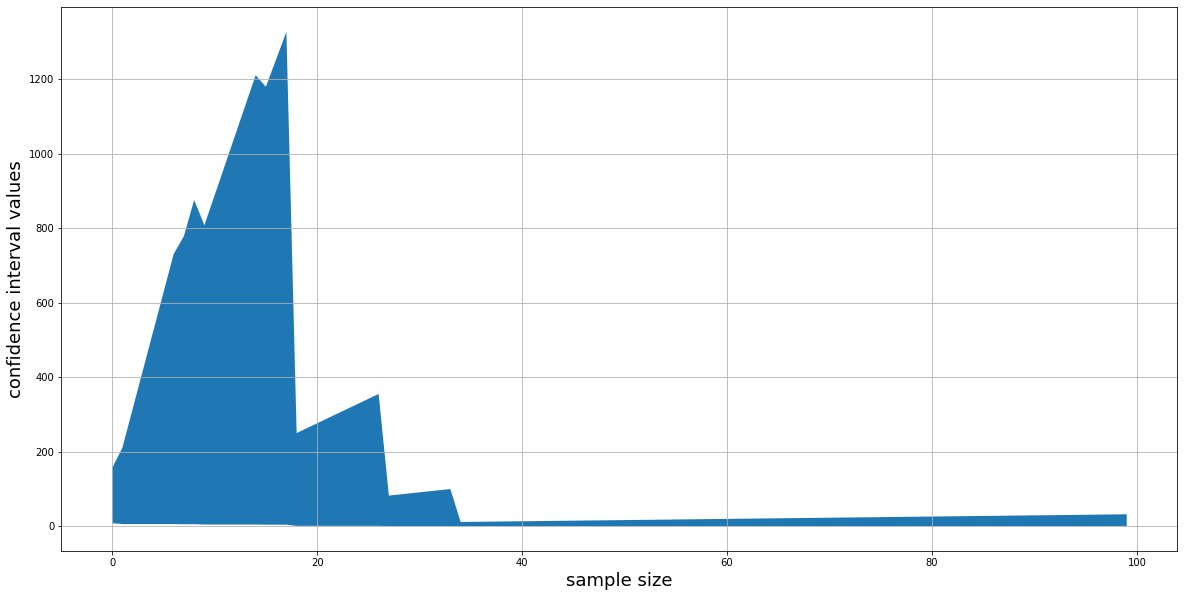

In [13]:
plotting(T_1, T_2)

In [14]:
print(f"Уровень доверия = {solution(uniform_X_min_interval, uniform_samples)}")

Уровень доверия = 0.958


$T_1 = X_{(n)}$,
$T_2 = \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}}$

In [15]:
# возвращает доверительные интервалы T1 и T2 (по формуле выше) для выборки из нормального распределения размера n
def uniform_X_max_interval(uniform_sample, n):
    
    T_1 = np.max(uniform_sample[0:n])
    T_2 = T_1 / (1 - alpha) ** (1. / n)
    return T_1, T_2

In [16]:
for n in N_nums:
    T_1[n], T_2[n] = uniform_X_max_interval(uniform_samples[0], n+1)

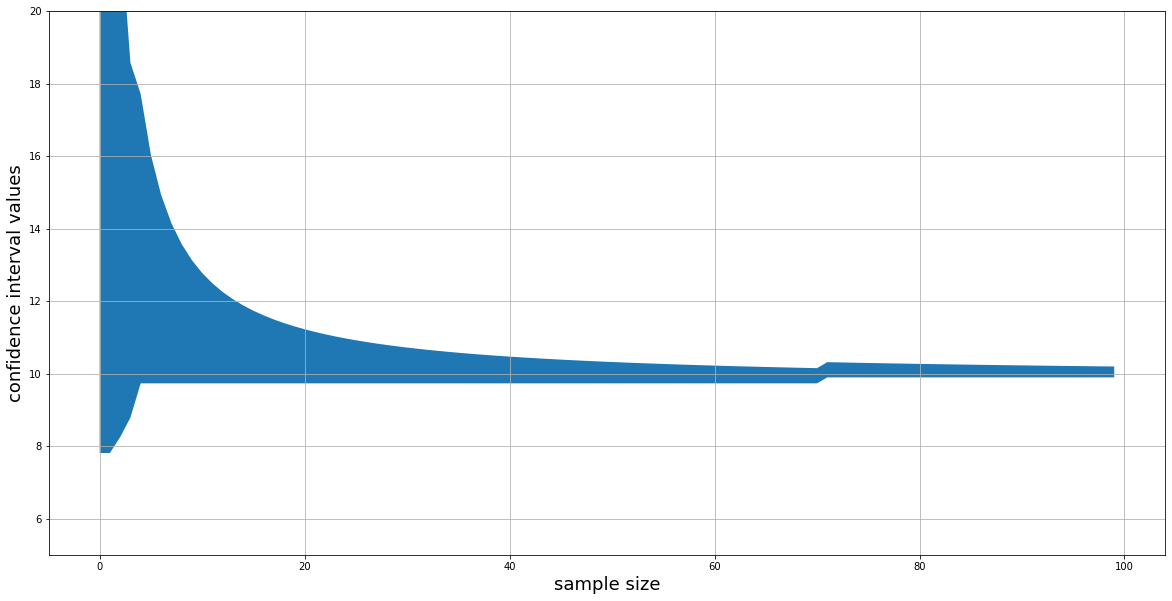

In [17]:
plotting(T_1, T_2, True)

In [18]:
print(f"Уровень доверия = {solution(uniform_X_max_interval, uniform_samples)}")

Уровень доверия = 0.954


$\textbf{Распределение Коши}$

In [19]:
cauchy_samples = np.array([sps.cauchy.rvs(loc=theta, size=N) for _ in K_nums])

In [20]:
quantile = 1.959964        # (alpha + 1) / 2 - квантиль распределения N(0,1)
pi = 3.1415926536
coef = quantile * pi / 2

$T_1 = \mu - \pi \frac{z_{\frac{\alpha + 1}{2}}}{2\sqrt{n}}$,
$T_2 = \mu + \pi \frac{z_{\frac{\alpha + 1}{2}}}{2\sqrt{n}}$,
где $\mu $ -- выборочная медиана, $z_{\alpha} $ -- $\alpha$-квантиль распределения $N(0,1)$.

In [21]:
# возвращает доверительные интервалы T1 и T2 (по формуле выше) для выборки из распределения Коши размера n
def cauchy_interval(cauchy_sample, n):
    
    sorted_sample = np.sort(cauchy_sample[0:n])
    mu = (sorted_sample[int(n/2-1)] + sorted_sample[int(n/2)]) / 2 if n%2 == 0 else sorted_sample[int((n+1)/2-1)]
    T_1 = mu - coef / n ** 0.5
    T_2 = mu + coef / n ** 0.5
    return T_1, T_2

In [22]:
for n in N_nums:
    T_1[n], T_2[n] = cauchy_interval(cauchy_samples[0], n+1)

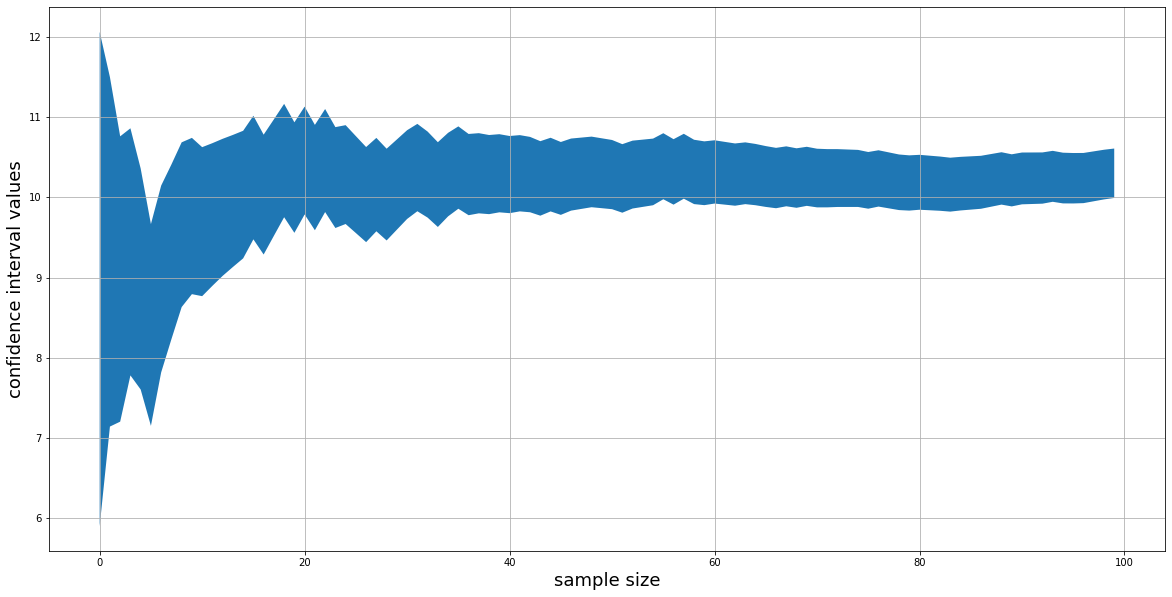

In [23]:
plotting(T_1, T_2)

In [24]:
print(f"Уровень доверия = {solution(cauchy_interval, cauchy_samples)}")

Уровень доверия = 0.948


$\textbf{Распределение Пуассона}$

In [25]:
poisson_samples = np.array([np.random.poisson(theta, size=N) for _ in K_nums])

$T_1 = \overline{X} - \sqrt{\frac{\overline{X}}{n}} \cdot z_{\frac{1+\alpha}{2}}$,
$T_2 = \overline{X} + \sqrt{\frac{\overline{X}}{n}} \cdot z_{\frac{1+\alpha}{2}}$

In [26]:
# возвращает доверительные интервалы T1 и T2 (по формуле выше) для выборки из распределения Пуассона размера n
def poisson_interval(poisson_sample, n):
    
    mean = np.sum(poisson_sample[0:n]) / n
    coef = (mean / n) ** 0.5
    T_1 = mean - coef * quantile
    T_2 = mean + coef * quantile
    return T_1, T_2

In [27]:
for n in N_nums:
    T_1[n], T_2[n] = poisson_interval(poisson_samples[0], n+1)

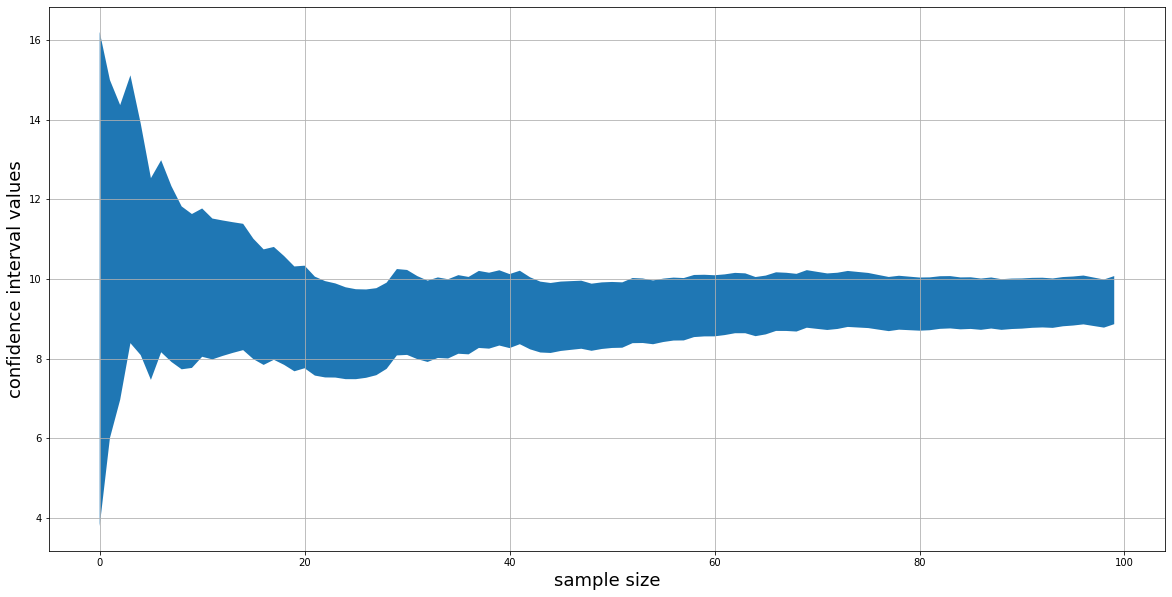

In [28]:
plotting(T_1, T_2)

In [29]:
print(f"Уровень доверия = {solution(poisson_interval, poisson_samples)}")

Уровень доверия = 0.955


$\textbf{Гамма-распределение}$

In [30]:
scale = 3

In [31]:
gamma_samples = np.array([np.random.gamma(theta, scale, size=N) for _ in K_nums])

$T_1 = \frac{\overline{X}}{\lambda}\left(1 - \frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}\lambda}\right)$,
$T_2 = \frac{\overline{X}}{\lambda}\left(1 + \frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}\lambda}\right)$

In [32]:
# возвращает доверительные интервалы T1 и T2 (по формуле выше) для выборки из Гамма-распределения размера n
def gamma_interval(gamma_sample, n):
    
    mean = np.sum(gamma_sample[0:n]) / n
    coef = scale * n ** 0.5
    T_1 = mean * (1 - quantile / coef) / scale
    T_2 = mean * (1 + quantile / coef) / scale
    return T_1, T_2

In [33]:
for n in N_nums:
    T_1[n], T_2[n] = gamma_interval(gamma_samples[0], n+1)

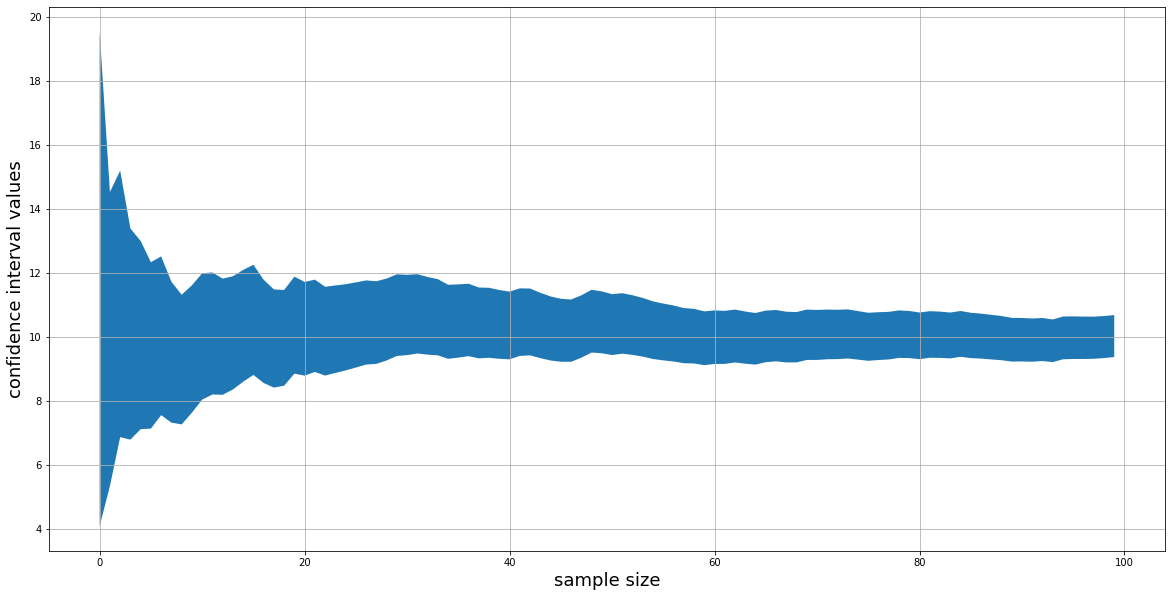

In [34]:
plotting(T_1, T_2)

In [35]:
print(f"Уровень доверия = {solution(gamma_interval, gamma_samples)}")

Уровень доверия = 0.951


$\textbf{Вывод:}$ для равномерного, гамма-распределений, а также для распределений Коши и Пуассона были сгенерированы выборки $X_1, ..., X_{100}$, по которым затем были построены доверительные интервалы с уровнем доверия 0.95 ($\textit{задание 1}$). В моём случае оцениваемый параметр $theta = 10$ для всех распределений попал в полученные интервалы, что не удивительно, поскольку вероятность этого события высока. Для $\textit{задания 2}$ требовалось сгенерировать большое количество выборок, по которым нужно было практическим путём определить уровень доверия. Я взяла $K = 1000$. Получилось, что подсчитанный уровень доверия лежал в окрестности своего истинного значения: $0.95 \pm 0.001$.